In [40]:
import os
import pandas as pd
import csv

from scipy.stats import linregress
import matplotlib.pyplot as plt


In [41]:
inv_data = "Metro_invt_fs_uc_sfrcondo_sm_month.csv"
value_data = "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
df_inv = pd.read_csv(inv_data)
df_value = pd.read_csv(value_data)
print(df_value.head())

   RegionID  SizeRank       RegionName RegionType StateName     2000-01-31   
0    102001         0    United States    country       NaN  112815.884620  \
1    394913         1     New York, NY        msa        NY  179016.866340   
2    753899         2  Los Angeles, CA        msa        CA  225229.750975   
3    394463         3      Chicago, IL        msa        IL  140260.935566   
4    394514         4       Dallas, TX        msa        TX  128720.957496   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...   
0  113014.297752  113260.209562  113787.522445  114394.274429  ...  \
1  179778.701216  180546.411097  182101.254842  183708.268404  ...   
2  226062.852930  227175.971878  229409.988288  231860.878234  ...   
3  140393.923049  140644.187618  141267.740940  142016.485458  ...   
4  128785.370590  128858.163118  129040.266249  129272.910526  ...   

      2022-06-30     2022-07-31     2022-08-31     2022-09-30     2022-10-31   
0  334961.616261  337453.60086

In [42]:
df_inv_mi = df_inv[df_inv['StateName']=='WA']
df_inv_mi

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
15,395078,15,"Seattle, WA",msa,WA,7287.0,8277.0,10148.0,11666.0,12963.0,...,9917.0,11295.0,11941.0,11850.0,11111.0,9913.0,8266.0,6781.0,5740.0,5714.0
99,395113,100,"Spokane, WA",msa,WA,2088.0,2285.0,2678.0,3043.0,3265.0,...,1631.0,1967.0,2184.0,2267.0,2178.0,1962.0,1655.0,1359.0,1140.0,1112.0
166,394741,168,"Kennewick, WA",msa,WA,855.0,890.0,978.0,1053.0,1120.0,...,590.0,656.0,697.0,720.0,708.0,683.0,628.0,573.0,523.0,527.0
170,394937,172,"Olympia, WA",msa,WA,776.0,824.0,949.0,1070.0,1184.0,...,799.0,918.0,996.0,986.0,925.0,819.0,703.0,610.0,526.0,506.0
179,394412,181,"Bremerton, WA",msa,WA,687.0,720.0,828.0,923.0,1009.0,...,705.0,814.0,900.0,902.0,839.0,728.0,611.0,512.0,434.0,426.0
191,395240,193,"Yakima, WA",msa,WA,538.0,555.0,594.0,621.0,660.0,...,524.0,593.0,652.0,674.0,662.0,616.0,551.0,481.0,437.0,433.0
202,394378,205,"Bellingham, WA",msa,WA,777.0,812.0,913.0,996.0,1082.0,...,632.0,747.0,849.0,881.0,828.0,732.0,614.0,519.0,459.0,469.0
323,394890,327,"Mount Vernon, WA",msa,WA,447.0,475.0,538.0,579.0,611.0,...,348.0,400.0,444.0,462.0,439.0,392.0,336.0,295.0,262.0,253.0
340,395218,345,"Wenatchee, WA",msa,WA,467.0,525.0,596.0,663.0,705.0,...,549.0,635.0,672.0,677.0,657.0,593.0,500.0,409.0,361.0,369.0
363,394804,368,"Longview, WA",msa,WA,337.0,344.0,391.0,435.0,480.0,...,394.0,451.0,499.0,507.0,493.0,463.0,425.0,385.0,348.0,326.0


In [43]:
df_value_mi = df_value[df_value['StateName']=='WA']
df_value_mi.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       ...
       '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
       '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31'],
      dtype='object', length=284)

In [44]:
df_unpivoted_value_wa = df_value_mi.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value_wa


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
0,395078,15,"Seattle, WA",msa,WA,2000-01-31,223721.739989
1,395113,100,"Spokane, WA",msa,WA,2000-01-31,123526.452122
2,394741,168,"Kennewick, WA",msa,WA,2000-01-31,131228.301982
3,394937,172,"Olympia, WA",msa,WA,2000-01-31,149943.442117
4,394412,181,"Bremerton, WA",msa,WA,2000-01-31,153818.650792
...,...,...,...,...,...,...,...
5575,395092,510,"Shelton, WA",msa,WA,2023-03-31,426028.494448
5576,395199,525,"Walla Walla, WA",msa,WA,2023-03-31,390558.799183
5577,395008,620,"Pullman, WA",msa,WA,2023-03-31,364908.619259
5578,394567,663,"Ellensburg, WA",msa,WA,2023-03-31,474549.838418


In [45]:
df_unpivoted_value_wa['Date']=pd.to_datetime(df_unpivoted_value_wa['Date'])

In [46]:
df_unpivoted_value_wa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5580 entries, 0 to 5579
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   RegionID             5580 non-null   int64         
 1   SizeRank             5580 non-null   int64         
 2   RegionName           5580 non-null   object        
 3   RegionType           5580 non-null   object        
 4   StateName            5580 non-null   object        
 5   Date                 5580 non-null   datetime64[ns]
 6   Average Home Values  4553 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 305.3+ KB


In [47]:
df_post_covid_value_wa = df_unpivoted_value_wa[df_unpivoted_value_wa['Date'].dt.year>=2019]
df_post_covid_value_wa

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
4560,395078,15,"Seattle, WA",msa,WA,2019-01-31,509735.263550
4561,395113,100,"Spokane, WA",msa,WA,2019-01-31,251661.491622
4562,394741,168,"Kennewick, WA",msa,WA,2019-01-31,282530.835360
4563,394937,172,"Olympia, WA",msa,WA,2019-01-31,327969.096735
4564,394412,181,"Bremerton, WA",msa,WA,2019-01-31,370547.295203
...,...,...,...,...,...,...,...
5575,395092,510,"Shelton, WA",msa,WA,2023-03-31,426028.494448
5576,395199,525,"Walla Walla, WA",msa,WA,2023-03-31,390558.799183
5577,395008,620,"Pullman, WA",msa,WA,2023-03-31,364908.619259
5578,394567,663,"Ellensburg, WA",msa,WA,2023-03-31,474549.838418


In [48]:
df_unpivoted_inv_wa = df_inv_mi.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv_wa

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
0,395078,15,"Seattle, WA",msa,WA,2018-03-31,7287.0
1,395113,100,"Spokane, WA",msa,WA,2018-03-31,2088.0
2,394741,168,"Kennewick, WA",msa,WA,2018-03-31,855.0
3,394937,172,"Olympia, WA",msa,WA,2018-03-31,776.0
4,394412,181,"Bremerton, WA",msa,WA,2018-03-31,687.0
...,...,...,...,...,...,...,...
1215,395092,510,"Shelton, WA",msa,WA,2023-03-31,176.0
1216,395199,525,"Walla Walla, WA",msa,WA,2023-03-31,149.0
1217,395008,620,"Pullman, WA",msa,WA,2023-03-31,87.0
1218,394567,663,"Ellensburg, WA",msa,WA,2023-03-31,148.0


In [49]:
df_unpivoted_inv_wa['Date']=pd.to_datetime(df_unpivoted_inv_wa['Date'])

In [50]:
df_post_covid_inv_wa = df_unpivoted_inv_wa[df_unpivoted_inv_wa['Date'].dt.year>=2019]
df_post_covid_inv_wa

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
200,395078,15,"Seattle, WA",msa,WA,2019-01-31,9544.0
201,395113,100,"Spokane, WA",msa,WA,2019-01-31,2029.0
202,394741,168,"Kennewick, WA",msa,WA,2019-01-31,903.0
203,394937,172,"Olympia, WA",msa,WA,2019-01-31,802.0
204,394412,181,"Bremerton, WA",msa,WA,2019-01-31,656.0
...,...,...,...,...,...,...,...
1215,395092,510,"Shelton, WA",msa,WA,2023-03-31,176.0
1216,395199,525,"Walla Walla, WA",msa,WA,2023-03-31,149.0
1217,395008,620,"Pullman, WA",msa,WA,2023-03-31,87.0
1218,394567,663,"Ellensburg, WA",msa,WA,2023-03-31,148.0


In [51]:
df_post_covid_inv_seattle = df_post_covid_inv_wa[df_post_covid_inv_wa['RegionName']=="Seattle, WA"]
df_post_covid_inv_seattle

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
200,395078,15,"Seattle, WA",msa,WA,2019-01-31,9544.0
220,395078,15,"Seattle, WA",msa,WA,2019-02-28,8300.0
240,395078,15,"Seattle, WA",msa,WA,2019-03-31,8772.0
260,395078,15,"Seattle, WA",msa,WA,2019-04-30,9585.0
280,395078,15,"Seattle, WA",msa,WA,2019-05-31,11590.0
300,395078,15,"Seattle, WA",msa,WA,2019-06-30,13026.0
320,395078,15,"Seattle, WA",msa,WA,2019-07-31,13915.0
340,395078,15,"Seattle, WA",msa,WA,2019-08-31,13639.0
360,395078,15,"Seattle, WA",msa,WA,2019-09-30,12970.0
380,395078,15,"Seattle, WA",msa,WA,2019-10-31,12071.0


<Axes: xlabel='Date'>

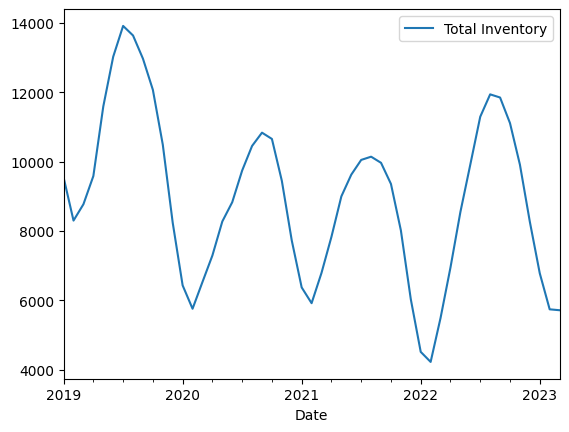

In [52]:
df_post_covid_inv_seattle.plot(x='Date', y='Total Inventory', kind='line')

In [53]:
df_post_covid_value_seattle = df_post_covid_value_wa[df_post_covid_value_wa['RegionName']=="Seattle, WA"]

df_post_covid_value_seattle

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
4560,395078,15,"Seattle, WA",msa,WA,2019-01-31,509735.263550
4580,395078,15,"Seattle, WA",msa,WA,2019-02-28,509516.645802
4600,395078,15,"Seattle, WA",msa,WA,2019-03-31,510765.436401
4620,395078,15,"Seattle, WA",msa,WA,2019-04-30,512439.084726
4640,395078,15,"Seattle, WA",msa,WA,2019-05-31,513782.342386
4660,395078,15,"Seattle, WA",msa,WA,2019-06-30,514577.378865
4680,395078,15,"Seattle, WA",msa,WA,2019-07-31,514882.015364
4700,395078,15,"Seattle, WA",msa,WA,2019-08-31,515157.583592
4720,395078,15,"Seattle, WA",msa,WA,2019-09-30,515279.843915
4740,395078,15,"Seattle, WA",msa,WA,2019-10-31,516472.884302


<Axes: xlabel='Date'>

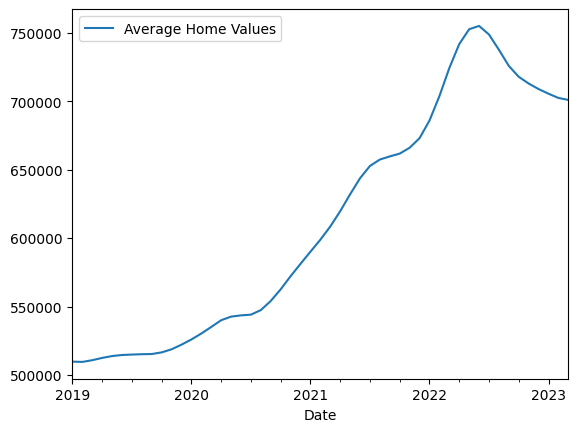

In [54]:
df_post_covid_value_seattle.plot(x='Date', y='Average Home Values', kind='line')

In [55]:
# Sort the schools by `Average Home Values` in ascending order and display the top 5 rows.
df_post_covid_value_seattle["Average Home Values"] =  df_post_covid_value_seattle["Average Home Values"].map("${:,.2f}".format)
df_post_covid_value_seattle

C:\Users\starb\AppData\Local\Temp\ipykernel_2436\206208567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_post_covid_value_seattle["Average Home Values"] =  df_post_covid_value_seattle["Average Home Values"].map("${:,.2f}".format)


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
4560,395078,15,"Seattle, WA",msa,WA,2019-01-31,"$509,735.26"
4580,395078,15,"Seattle, WA",msa,WA,2019-02-28,"$509,516.65"
4600,395078,15,"Seattle, WA",msa,WA,2019-03-31,"$510,765.44"
4620,395078,15,"Seattle, WA",msa,WA,2019-04-30,"$512,439.08"
4640,395078,15,"Seattle, WA",msa,WA,2019-05-31,"$513,782.34"
4660,395078,15,"Seattle, WA",msa,WA,2019-06-30,"$514,577.38"
4680,395078,15,"Seattle, WA",msa,WA,2019-07-31,"$514,882.02"
4700,395078,15,"Seattle, WA",msa,WA,2019-08-31,"$515,157.58"
4720,395078,15,"Seattle, WA",msa,WA,2019-09-30,"$515,279.84"
4740,395078,15,"Seattle, WA",msa,WA,2019-10-31,"$516,472.88"


In [56]:
# Sort the schools by `Average Home Values` in ascending order and display the top 5 rows.
top_five_cities = df_post_covid_value_seattle.sort_values("Average Home Values", ascending = False)
top_five_cities.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
5380,395078,15,"Seattle, WA",msa,WA,2022-06-30,"$754,950.04"
5360,395078,15,"Seattle, WA",msa,WA,2022-05-31,"$752,525.30"
5400,395078,15,"Seattle, WA",msa,WA,2022-07-31,"$748,674.71"
5340,395078,15,"Seattle, WA",msa,WA,2022-04-30,"$741,671.94"
5420,395078,15,"Seattle, WA",msa,WA,2022-08-31,"$737,544.18"


In [57]:
# Sort the schools by `Average Home Values` in ascending order and display the bottom 5 rows.
bottom_five_cities = df_post_covid_value_seattle.sort_values("Average Home Values", ascending = True)
bottom_five_cities.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
4580,395078,15,"Seattle, WA",msa,WA,2019-02-28,"$509,516.65"
4560,395078,15,"Seattle, WA",msa,WA,2019-01-31,"$509,735.26"
4600,395078,15,"Seattle, WA",msa,WA,2019-03-31,"$510,765.44"
4620,395078,15,"Seattle, WA",msa,WA,2019-04-30,"$512,439.08"
4640,395078,15,"Seattle, WA",msa,WA,2019-05-31,"$513,782.34"
